
# Project: Investigate a Dataset (European Soccer Database)

## By Jeeva K

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
# Introduction

> European Soccer Dataset is analyzed and presented with the question. This dataset consists of the various tables with player, player_attributes, country, team , team attributes, and leagues in SQL. The SQL data is converted into dataframe for ease use of the data. The columns are dropped and renamed according to the need for data analysis and visualization.
The Questions decided on datasets are:

* > **"Which foot is most preferred by player durning defense and attact?"** 

* > **"Correlation between Overall rating of player, Free Kick Accuracy and Penalties"**

* > **"What is the effect of BMI Index on overall rating of the players."**  


### Importing needed libraries into the Notebook.

In [1]:
import numpy as np # importing numpy.
import pandas as pd # imorting pandas.
import sqlite3 # Sql Database libary
from datetime import timedelta
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Reading Data From SQL File into Dataframe

In [2]:
with sqlite3.connect('../input/soccer/database.sqlite') as con:
    countries = pd.read_sql_query("SELECT * from Country", con)
    matches = pd.read_sql_query("SELECT * from Match", con)
    leagues = pd.read_sql_query("SELECT * from League", con)
    teams = pd.read_sql_query("SELECT * from Team", con)
    player = pd.read_sql_query("SELECT * from Player",con)
    player_attributes = pd.read_sql_query("SELECT * from Player_Attributes",con)
    sequence = pd.read_sql_query("SELECT * from sqlite_sequence",con)
    team_attributes = pd.read_sql_query("SELECT * from Team_Attributes",con)

### Countries, matches and leagues are merged together

In [3]:
countries.head(1) # To investigate the columns and rows

,id,name
0,1,Belgium


In [4]:
leagues.head(1) # To investigate the columns and rows

,id,country_id,name
0,1,1,Belgium Jupiler League


In [5]:
matches.head(1) # To investigate the columns and rows 

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.0,1.65,3.4,4.5,1.78,3.25,4.0,1.73,3.4,4.2


In [6]:
matches.info() # to see the informatiom about the dataframe No of Columns, Total Rows and the datatypes of the columns 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Columns: 115 entries, id to BSA
dtypes: float64(96), int64(9), object(10)
memory usage: 22.8+ MB


In [7]:
#Merge country and leauge data
countries_leagues = countries.merge(leagues,left_on="id",right_on="id",how="outer") # joining the countries and league dataframe together through outer join
countries_leagues = countries_leagues.drop("id",axis = 1) # dropping the id from the dataframe
countries_leagues = countries_leagues.rename(columns={'name_x':"country", 'name_y':"league"}) # renaming the name_x and name_y as country and league
countries_leagues.head()

,country,country_id,league
0,Belgium,1,Belgium Jupiler League
1,England,1729,England Premier League
2,France,4769,France Ligue 1
3,Germany,7809,Germany 1. Bundesliga
4,Italy,10257,Italy Serie A


In [8]:
#subsetting data with necessary columns
matches_new = matches[['id', 'country_id', 'league_id', 'season', 'stage', 'date',
                   'match_api_id', 'home_team_api_id', 'away_team_api_id',
                    'home_team_goal', 'away_team_goal']] # creating the new dataframe with the existing data from the matches dataframe

matches_new = matches_new.drop("id",axis=1) # dropping the id column from the dataframe.

In [9]:
matches_new.head(1)  # to inspect the columns and rows of merged dataframe

,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal
0,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1


### Team and Team_attributes are merged together

In [10]:
teams.head(1) # to inspect the columns and rows of the dataframe

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN


In [11]:
team_attributes.head(1) # to inspect the columns and rows of dataframe

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,...,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover


In [12]:
teams_new = teams.merge(team_attributes,left_on="team_api_id",right_on="team_api_id",how="left") # merging the team and team attributed dataframe together with left join.
teams_new = teams_new.drop(['id_x','id_y', 'team_fifa_api_id_y'],axis=1) # dropping the columns in the dataframe
teams_new["date"] = pd.to_datetime(teams_new["date"],format="%Y-%m-%d") # changing the datetime format 
teams_new = teams_new.rename(columns={'team_fifa_api_id_x':"team_fifa_api_id"}) # renaming the column

In [13]:
teams_new.shape # checking the shape of dataframe

(1469, 26)

In [14]:
teams_new.head(1) # to see the informatiom about the dataframe No of Columns, Total Rows and the datatypes of the columns 

,team_api_id,team_fifa_api_id,team_long_name,team_short_name,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,9987,673.0,KRC Genk,GEN,2010-02-22,45.0,Balanced,NaN,Little,45.0,...,60.0,Normal,Organised,70.0,High,65.0,Press,70.0,Wide,Cover


### Player and Player_Attributes are Combined Together

In [15]:
player.head(1) # to see the informatiom about the dataframe No of Columns, Total Rows and the datatypes of the columns 

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187


In [16]:
player_attributes.head(1) # inspect  the dataframe

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0


In [17]:
player_info = player.merge(player_attributes,left_on="player_api_id",right_on="player_api_id",how="left") # merging the player and player attributes dataframe
player_info = player_info.drop(['id_x','id_y', 'player_fifa_api_id_y'],axis=1) # dropping the columns
player_info["date"] = pd.to_datetime(player_info["date"],format="%Y-%m-%d") # Changing the time and data format
player_info = player_info.rename(columns={'player_fifa_api_id_x':"player_fifa_api_id"}) # renaming the column names

In [18]:
player_info.head(1) # to see the informatiom about the dataframe No of Columns, Total Rows and the datatypes of the columns 

,player_api_id,player_name,player_fifa_api_id,birthday,height,weight,date,overall_rating,potential,preferred_foot,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,2016-02-18,67.0,71.0,right,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0


<a id='wrangling'></a>
## Data Wrangling

> The checking of null values and duplicates in the dataframe.

### General Properties

In [19]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
matches_new.info() #checking the datatypes of the columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Data columns (total 10 columns):
country_id          25979 non-null int64
league_id           25979 non-null int64
season              25979 non-null object
stage               25979 non-null int64
date                25979 non-null object
match_api_id        25979 non-null int64
home_team_api_id    25979 non-null int64
away_team_api_id    25979 non-null int64
home_team_goal      25979 non-null int64
away_team_goal      25979 non-null int64
dtypes: int64(8), object(2)
memory usage: 2.0+ MB


* #### *No null values and duplicates in the matches_new Dataframe*

In [20]:
matches_new.duplicated().sum().any() # checking the duplicates 
# No duplicate data in the Matches_new Dataframe.

False

In [21]:
teams_new.info() # checking the shape and datatypes of the team_new Dataframe.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1469 entries, 0 to 1468
Data columns (total 26 columns):
team_api_id                       1469 non-null int64
team_fifa_api_id                  1458 non-null float64
team_long_name                    1469 non-null object
team_short_name                   1469 non-null object
date                              1458 non-null datetime64[ns]
buildUpPlaySpeed                  1458 non-null float64
buildUpPlaySpeedClass             1458 non-null object
buildUpPlayDribbling              489 non-null float64
buildUpPlayDribblingClass         1458 non-null object
buildUpPlayPassing                1458 non-null float64
buildUpPlayPassingClass           1458 non-null object
buildUpPlayPositioningClass       1458 non-null object
chanceCreationPassing             1458 non-null float64
chanceCreationPassingClass        1458 non-null object
chanceCreationCrossing            1458 non-null float64
chanceCreationCrossingClass       1458 non-null object
c

In [22]:
teams_new.duplicated().sum().any() # checking for duplicate datas.
# Duplicate datas found in the dataframe.

True

In [23]:
teams_new.isnull().sum().any() # checking null values in the dataframe.

True

* #### *Null values are found in the teams_new dataframe. buildUpPlayDribbling column has for more null values in the dataframe so dropping the column.*

In [24]:
player_info.info() # checking shape and datatype of the dataframe.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183978 entries, 0 to 183977
Data columns (total 45 columns):
player_api_id          183978 non-null int64
player_name            183978 non-null object
player_fifa_api_id     183978 non-null int64
birthday               183978 non-null object
height                 183978 non-null float64
weight                 183978 non-null int64
date                   183978 non-null datetime64[ns]
overall_rating         183142 non-null float64
potential              183142 non-null float64
preferred_foot         183142 non-null object
attacking_work_rate    180748 non-null object
defensive_work_rate    183142 non-null object
crossing               183142 non-null float64
finishing              183142 non-null float64
heading_accuracy       183142 non-null float64
short_passing          183142 non-null float64
volleys                181265 non-null float64
dribbling              183142 non-null float64
curve                  181265 non-null float64


In [25]:
player_info.duplicated().sum().any()

True

In [26]:
player_info.isnull().sum().any()

True

* #### *Null values and duplicates are found in player_info Dataframe*

# Data Cleaning (Dropping Null Values and Duplicates in the Dataframe)

* Null Values and Duplicates in the dataframe are Dropped to clean the data for further data analysis.

In [27]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.


In [28]:
(matches.country_id == matches.league_id).any() # country_id and league_id are same.

True

In [29]:
matches_new = matches_new.drop(['league_id'],axis=1) # Dropping league_id because it is same as country_id.

In [30]:
matches_new.head(1)

,country_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal
0,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1


In [31]:
matches_new = matches_new.rename(columns={'country_id':"id"}) # renaming country_id as id
matches_new.head()

,id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal
0,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1
1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0
2,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,3
3,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,0
4,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,3


In [32]:
matches_new.info() # checking shape and datatypes after cleaning the matches_new dataframe.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Data columns (total 9 columns):
id                  25979 non-null int64
season              25979 non-null object
stage               25979 non-null int64
date                25979 non-null object
match_api_id        25979 non-null int64
home_team_api_id    25979 non-null int64
away_team_api_id    25979 non-null int64
home_team_goal      25979 non-null int64
away_team_goal      25979 non-null int64
dtypes: int64(7), object(2)
memory usage: 1.8+ MB


In [33]:
teams_new.head(1)

,team_api_id,team_fifa_api_id,team_long_name,team_short_name,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,9987,673.0,KRC Genk,GEN,2010-02-22,45.0,Balanced,NaN,Little,45.0,...,60.0,Normal,Organised,70.0,High,65.0,Press,70.0,Wide,Cover


In [34]:
teams_new.drop_duplicates(inplace=True) # dropping the duplicates in the dataframe.

In [35]:
teams_new.info() # checking for duplicates after cleaning.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1468 entries, 0 to 1468
Data columns (total 26 columns):
team_api_id                       1468 non-null int64
team_fifa_api_id                  1457 non-null float64
team_long_name                    1468 non-null object
team_short_name                   1468 non-null object
date                              1457 non-null datetime64[ns]
buildUpPlaySpeed                  1457 non-null float64
buildUpPlaySpeedClass             1457 non-null object
buildUpPlayDribbling              488 non-null float64
buildUpPlayDribblingClass         1457 non-null object
buildUpPlayPassing                1457 non-null float64
buildUpPlayPassingClass           1457 non-null object
buildUpPlayPositioningClass       1457 non-null object
chanceCreationPassing             1457 non-null float64
chanceCreationPassingClass        1457 non-null object
chanceCreationCrossing            1457 non-null float64
chanceCreationCrossingClass       1457 non-null object
c

In [36]:
teams_new = teams_new.drop(['buildUpPlayDribbling'],axis=1) # dropping the buildUpPlayDribbling because the column has more null values.

In [37]:
teams_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1468 entries, 0 to 1468
Data columns (total 25 columns):
team_api_id                       1468 non-null int64
team_fifa_api_id                  1457 non-null float64
team_long_name                    1468 non-null object
team_short_name                   1468 non-null object
date                              1457 non-null datetime64[ns]
buildUpPlaySpeed                  1457 non-null float64
buildUpPlaySpeedClass             1457 non-null object
buildUpPlayDribblingClass         1457 non-null object
buildUpPlayPassing                1457 non-null float64
buildUpPlayPassingClass           1457 non-null object
buildUpPlayPositioningClass       1457 non-null object
chanceCreationPassing             1457 non-null float64
chanceCreationPassingClass        1457 non-null object
chanceCreationCrossing            1457 non-null float64
chanceCreationCrossingClass       1457 non-null object
chanceCreationShooting            1457 non-null float64


In [38]:
teams_new.fillna(teams_new.mean(axis=0)) # filling the na values with mean
teams_new.head()

,team_api_id,team_fifa_api_id,team_long_name,team_short_name,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,9987,673.0,KRC Genk,GEN,2010-02-22,45.0,Balanced,Little,45.0,Mixed,...,60.0,Normal,Organised,70.0,High,65.0,Press,70.0,Wide,Cover
1,9987,673.0,KRC Genk,GEN,2011-02-22,66.0,Balanced,Little,52.0,Mixed,...,51.0,Normal,Organised,48.0,Medium,47.0,Press,54.0,Normal,Offside Trap
2,9987,673.0,KRC Genk,GEN,2012-02-22,53.0,Balanced,Little,55.0,Mixed,...,56.0,Normal,Organised,47.0,Medium,45.0,Press,55.0,Normal,Cover
3,9987,673.0,KRC Genk,GEN,2013-09-20,58.0,Balanced,Little,38.0,Mixed,...,56.0,Normal,Organised,47.0,Medium,45.0,Press,55.0,Normal,Cover
4,9987,673.0,KRC Genk,GEN,2014-09-19,58.0,Balanced,Normal,38.0,Mixed,...,56.0,Normal,Organised,47.0,Medium,45.0,Press,55.0,Normal,Cover


In [39]:
teams_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1468 entries, 0 to 1468
Data columns (total 25 columns):
team_api_id                       1468 non-null int64
team_fifa_api_id                  1457 non-null float64
team_long_name                    1468 non-null object
team_short_name                   1468 non-null object
date                              1457 non-null datetime64[ns]
buildUpPlaySpeed                  1457 non-null float64
buildUpPlaySpeedClass             1457 non-null object
buildUpPlayDribblingClass         1457 non-null object
buildUpPlayPassing                1457 non-null float64
buildUpPlayPassingClass           1457 non-null object
buildUpPlayPositioningClass       1457 non-null object
chanceCreationPassing             1457 non-null float64
chanceCreationPassingClass        1457 non-null object
chanceCreationCrossing            1457 non-null float64
chanceCreationCrossingClass       1457 non-null object
chanceCreationShooting            1457 non-null float64


In [40]:
teams_new.dropna(inplace=True) #dropping the null values 

In [41]:
teams_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1457 entries, 0 to 1467
Data columns (total 25 columns):
team_api_id                       1457 non-null int64
team_fifa_api_id                  1457 non-null float64
team_long_name                    1457 non-null object
team_short_name                   1457 non-null object
date                              1457 non-null datetime64[ns]
buildUpPlaySpeed                  1457 non-null float64
buildUpPlaySpeedClass             1457 non-null object
buildUpPlayDribblingClass         1457 non-null object
buildUpPlayPassing                1457 non-null float64
buildUpPlayPassingClass           1457 non-null object
buildUpPlayPositioningClass       1457 non-null object
chanceCreationPassing             1457 non-null float64
chanceCreationPassingClass        1457 non-null object
chanceCreationCrossing            1457 non-null float64
chanceCreationCrossingClass       1457 non-null object
chanceCreationShooting            1457 non-null float64


In [42]:
player_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183978 entries, 0 to 183977
Data columns (total 45 columns):
player_api_id          183978 non-null int64
player_name            183978 non-null object
player_fifa_api_id     183978 non-null int64
birthday               183978 non-null object
height                 183978 non-null float64
weight                 183978 non-null int64
date                   183978 non-null datetime64[ns]
overall_rating         183142 non-null float64
potential              183142 non-null float64
preferred_foot         183142 non-null object
attacking_work_rate    180748 non-null object
defensive_work_rate    183142 non-null object
crossing               183142 non-null float64
finishing              183142 non-null float64
heading_accuracy       183142 non-null float64
short_passing          183142 non-null float64
volleys                181265 non-null float64
dribbling              183142 non-null float64
curve                  181265 non-null float64


In [43]:
player_info.dropna(inplace=True) # dropping the null values.

In [44]:
player_info.duplicated().sum() # checking for duplicates

0

In [45]:
player_info.info() # checking shape and datatypes.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180354 entries, 0 to 183977
Data columns (total 45 columns):
player_api_id          180354 non-null int64
player_name            180354 non-null object
player_fifa_api_id     180354 non-null int64
birthday               180354 non-null object
height                 180354 non-null float64
weight                 180354 non-null int64
date                   180354 non-null datetime64[ns]
overall_rating         180354 non-null float64
potential              180354 non-null float64
preferred_foot         180354 non-null object
attacking_work_rate    180354 non-null object
defensive_work_rate    180354 non-null object
crossing               180354 non-null float64
finishing              180354 non-null float64
heading_accuracy       180354 non-null float64
short_passing          180354 non-null float64
volleys                180354 non-null float64
dribbling              180354 non-null float64
curve                  180354 non-null float64


In [46]:
player_info.player_name.nunique() # unique no of values in player_name.

10226

In [47]:
player_info.head()

,player_api_id,player_name,player_fifa_api_id,birthday,height,weight,date,overall_rating,potential,preferred_foot,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,2016-02-18,67.0,71.0,right,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,2015-11-19,67.0,71.0,right,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,2015-09-21,62.0,66.0,right,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,2015-03-20,61.0,65.0,right,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,2007-02-22,61.0,65.0,right,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [48]:
player_info.preferred_foot.unique() # Checking Unique values in preferred_foot column.

array(['right', 'left'], dtype=object)

* #### *Null Values and Duplicates are droped from the dataframe. The Dataframe is cleaned and ready for exploratory data analysis.*

<a id='eda'></a>
# Exploratory Data Analysis


### Research Question 1 (Which foot is most preferred by player durning defense and attact?)

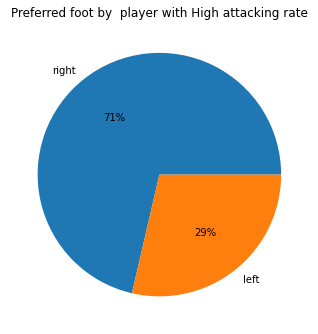

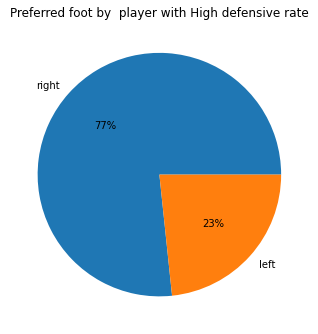

In [49]:
x = player_info[player_info["attacking_work_rate"] == 'high'] # attacking_work_rate of the player with preferred_foot.
x = x.groupby(["player_api_id","player_name","preferred_foot"]).count().reset_index() #counting the preferred_foot values.
plt.figure(figsize=(12,6))
plt.subplot(121)
x["preferred_foot"].value_counts().plot.pie(autopct = "%1.0f%%")
plt.ylabel("")
plt.title("Preferred foot by  player with High attacking rate")

x = player_info[player_info["defensive_work_rate"] == 'high'] # defensive_work_rate of the player with preferred_foot.
x = x.groupby(["player_api_id","player_name","preferred_foot"]).count().reset_index() #counting the preferred_foot values.
plt.figure(figsize=(12,6))
plt.subplot(122)
x["preferred_foot"].value_counts().plot.pie(autopct = "%1.0f%%")
plt.ylabel("")
plt.title("Preferred foot by  player with High defensive rate")
plt.show()

**The above pie chart shows 71% of player prefer right leg durning the attacking and 77% durning defensive.**


### Research Question 2  (Correlation between Overall rating of player, Free Kick Accuracy and Penalties)

In [50]:
player_info['overall_rating'].corr(player_info['free_kick_accuracy']) # correlation between overall rating and free kick accuracy.

0.3498003114423883

**Correlation between Overall rating and Free Kick Accuracy is .35. It shows the moderate significance between the two variables.**

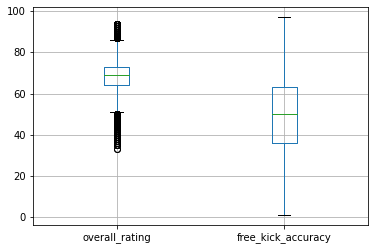

In [51]:
boxplot = player_info.boxplot(['overall_rating', 'free_kick_accuracy']) # plot the boxplot

> The Boxplot shows the mean of the Overall Rating is higher than the Free Kick Accuracy. The Overall Rating has more Outlier than the Free Kick Accuracy.

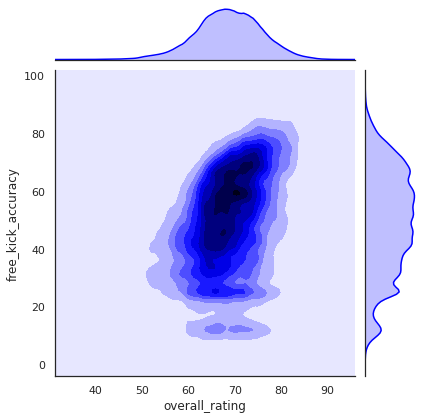

In [52]:
sns.set(style="white", color_codes=True)
sns.jointplot(player_info["overall_rating"], player_info["free_kick_accuracy"], kind='kde', color="blue") # joint plot

The Joint Plot shows the overall rating and free kick accuracy lies in the range of the 70.

In [53]:
player_info['overall_rating'].corr(player_info['penalties']) # correlation between overall rating and penalties.

0.39271510791118824

The correlation of overall rating and penalties is .392 which has moderate significance between the two variables

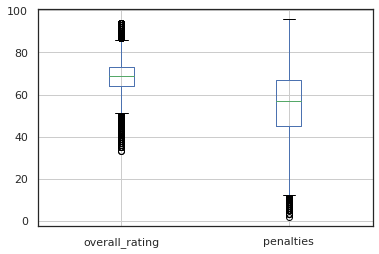

In [54]:
boxplot = player_info.boxplot(['overall_rating', 'penalties']) #plotting boxplot.

The boxplot shows overall rating has mean higher than penalties, the more outliers in overall rating than the outliers in penalties.

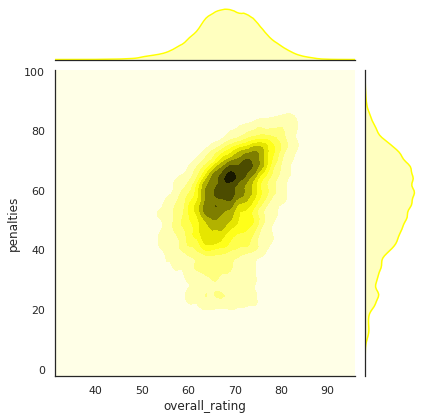

In [55]:
sns.set(style="white", color_codes=True)
sns.jointplot(player_info["overall_rating"], player_info["penalties"], kind='kde', color="yellow")

## Research Question 3 (What is the effect of BMI Index on overall rating of the players)

In [56]:
bmi = player_info.iloc[:,[4,5,7]] # creating new dataframe with height, weight and overall rating.
bmi.head()

,height,weight,overall_rating
0,182.88,187,67.0
1,182.88,187,67.0
2,182.88,187,62.0
3,182.88,187,61.0
4,182.88,187,61.0


In [57]:
bmi['weight_kg'] = bmi.apply(lambda row: row.weight/2.20462 , axis =1) #creating new column with weight_kg 
# converting Weight in pounds to kg.

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [58]:
bmi.drop(['weight'],axis =1, inplace=True) # dropping the weight in pounds column.

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [59]:
bmi.rename(columns ={'weight_kg' : "weight"}) # renaming the column

,height,overall_rating,weight
0,182.88,67.0,84.821874
1,182.88,67.0,84.821874
2,182.88,62.0,84.821874
3,182.88,61.0,84.821874
4,182.88,61.0,84.821874
...,...,...,...
183973,180.34,83.0,79.832352
183974,180.34,78.0,79.832352
183975,180.34,77.0,79.832352
183976,180.34,78.0,79.832352


In [60]:
bmi.info() # checking shape and datatype.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180354 entries, 0 to 183977
Data columns (total 3 columns):
height            180354 non-null float64
overall_rating    180354 non-null float64
weight_kg         180354 non-null float64
dtypes: float64(3)
memory usage: 5.5 MB


In [61]:
bmi['index_bmi'] = bmi.apply(lambda row: (row.weight_kg / (row.height**2))*10000 , axis =1) # creating new column with Bmi index by calculating.

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [62]:
bmi.head()

,height,overall_rating,weight_kg,index_bmi
0,182.88,67.0,84.821874,25.361529
1,182.88,67.0,84.821874,25.361529
2,182.88,62.0,84.821874,25.361529
3,182.88,61.0,84.821874,25.361529
4,182.88,61.0,84.821874,25.361529


In [63]:
bmi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180354 entries, 0 to 183977
Data columns (total 4 columns):
height            180354 non-null float64
overall_rating    180354 non-null float64
weight_kg         180354 non-null float64
index_bmi         180354 non-null float64
dtypes: float64(4)
memory usage: 6.9 MB


In [64]:
bmi.overall_rating.corr(bmi.index_bmi)

0.1024565466706435

The correlation between the BMI and Overall Rating is .102 which has very less significance between the two variables.

In [65]:
def getBmiresults(index_bmi): # function to convert the bmi values into string
    if(index_bmi < 16):
        bmi_result = "severely underweight"
    elif(index_bmi >= 16 and index_bmi < 18.5):
        bmi_result = "underweight"
 
    elif(index_bmi >= 18.5 and index_bmi < 25):
        bmi_result = "healthy"
 
    elif(index_bmi >= 25 and index_bmi < 30):
        bmi_result = "overweight"
 
    elif(index_bmi >=30):
        bmi_result = "severely overweight"
    return bmi_result


In [66]:
bmi['bmi_result'] = bmi['index_bmi'].apply(getBmiresults) # to convert the BMI values in to String like Healthy, Overweight, Underweight and Severly Overweight.
bmi.head()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,height,overall_rating,weight_kg,index_bmi,bmi_result
0,182.88,67.0,84.821874,25.361529,overweight
1,182.88,67.0,84.821874,25.361529,overweight
2,182.88,62.0,84.821874,25.361529,overweight
3,182.88,61.0,84.821874,25.361529,overweight
4,182.88,61.0,84.821874,25.361529,overweight


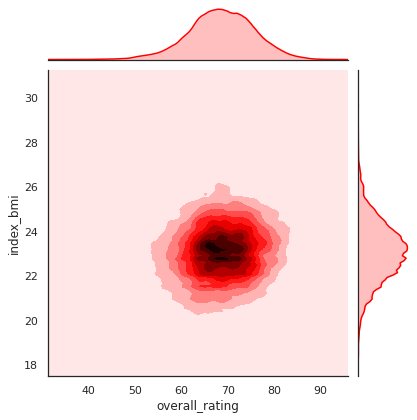

In [67]:
sns.set(style="white", color_codes=True)
sns.jointplot(bmi["overall_rating"], bmi["index_bmi"], kind='kde', color="red") # Plot joint plot

The joint plot shows that the relation between overall rating and BMI Index lies between 22-25. This shows players overall rating is between 60-70. We can't decide the performance of the players with BMI Index.

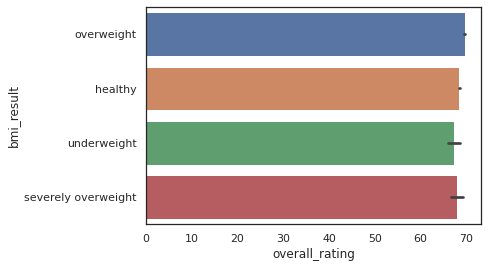

In [83]:
sns.barplot(bmi["overall_rating"], bmi["bmi_result"])

In [69]:
bmi_23 = bmi.groupby('bmi_result').count()
bmi_23.head()

,height,overall_rating,weight_kg,index_bmi
bmi_result,,,,
healthy,167032,167032,167032,167032
overweight,13178,13178,13178,13178
severely overweight,35,35,35,35
underweight,109,109,109,109


In [71]:
bmi.head(1)

,height,overall_rating,weight_kg,index_bmi,bmi_result
0,182.88,67.0,84.821874,25.361529,overweight


In [72]:
bmi.groupby("bmi_result").count().describe()

,height,overall_rating,weight_kg,index_bmi
count,4.000000,4.000000,4.000000,4.000000
mean,45088.500000,45088.500000,45088.500000,45088.500000
std,81530.097684,81530.097684,81530.097684,81530.097684
min,35.000000,35.000000,35.000000,35.000000
25%,90.500000,90.500000,90.500000,90.500000
50%,6643.500000,6643.500000,6643.500000,6643.500000
75%,51641.500000,51641.500000,51641.500000,51641.500000
max,167032.000000,167032.000000,167032.000000,167032.000000


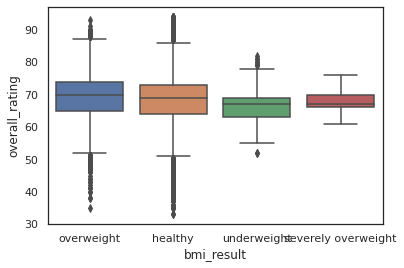

In [73]:
sns.boxplot(bmi["bmi_result"],bmi["overall_rating"])

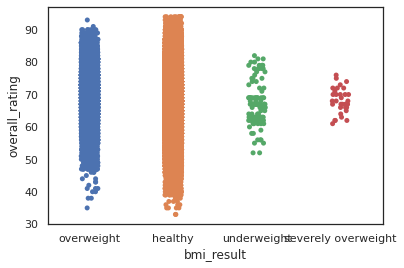

In [75]:
sns.stripplot(bmi["bmi_result"],bmi["overall_rating"])

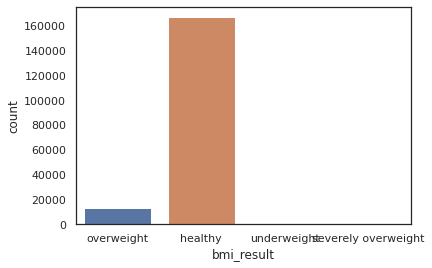

In [77]:
sns.countplot(bmi["bmi_result"])

The BMI index shows that most of the players are healthy. But the performance of the players can't be determined with BMI Index.

<a id='conclusions'></a>
## Conclusions


It was very good working on this project. The analysis of dataset with respect to  player_attributes of the preferred foot, BMI Index, Free Kick Accuracy and penalties with the overall rating of the player was done.

**Limitations**
**(1) Missing data**
>During data wrangling some  data was missing in the table. The columns needed for my questions are all clean. The columns were very helpful in answering other interesting questions such as betting odds. In the team_attributes data, more than 80% of data in the column 'buildUpPlayDribbling' is missing, therefore analysis on this column will be less reliable .

**(2) Insufficient amount of data**
>Team_attributes when analyzing column 'buildUpPlayPositioningClass' the most of the data in this column is insufficient and the column is dropped, So that the result will be more reliable.

### **Player_Info Analysis**
* > *Question 1 * 
**"Which foot is most preferred by player durning defense and attact?"** 

>The pie chart shows 71% of player prefer right leg during attack and 77% during defense. The preference of right leg durning defense is more when compare to attack during the game.

* > *Question 2 * 
**"Correlation between Overall rating of player and Free Kick Accuracy, Penalties"**

>The correlation between Overall rating and Free Kick Accuracy is .35. It shows the moderate significance between the two variables.

>The correlation of overall rating and penalties is .392 which also shows moderate significance between the two variables

* > *Question 3*  
**"What is the effect of BMI Index on overall rating of the players."**  

>The Effect of BMI Index with Overall rating shows that the most of the player are Healthy, and the BMI index doesn't plays any important role in the overall rating of the players.